In [17]:
import numpy as np

In [48]:
#EX2
def myPCA(X, n_components, labels):
    X_cov = np.cov(X.T)
    e_values, e_vectors = np.linalg.eigh(X_cov)
    
    e_ind_order = np.flip(e_values.argsort())
    e_values = e_values[e_ind_order]
    e_vectors = e_vectors[:, e_ind_order]
    
    evd = X @ e_vectors
    fig, ax = plt.subplots(figsize=(10, 5))
    if n_components == 2:
        ax.scatter(evd[:, 0], evd[:, 1], c=labels)
        ax.set_title(f"Plots for reducing to {n_components}-D")
        fig.suptitle("PCA by Numpy")
        plt.show()
    elif n_components == 1:
        ax.scatter(evd[:, 0], np.zeros_like(evd[:, 0]), c=labels)
        ax.set_title(f"Plots for reducing to {n_components}-D")
        fig.suptitle("PCA by Numpy")
        plt.show()

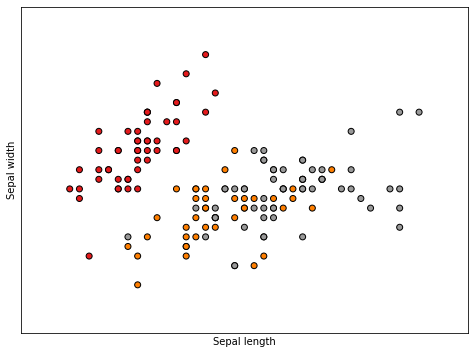

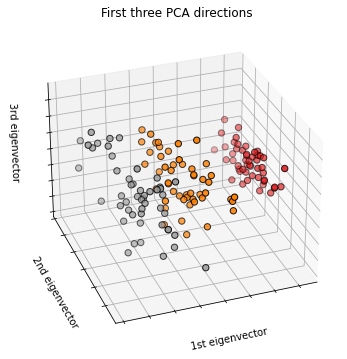

In [49]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

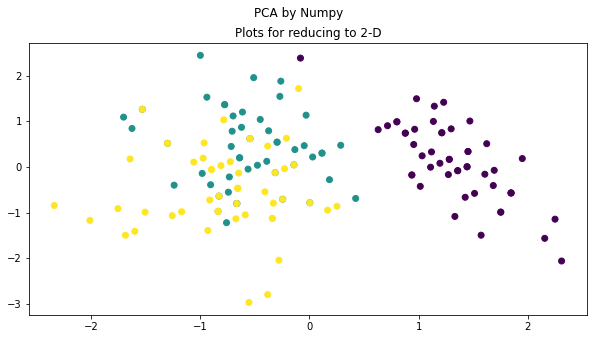

In [50]:
#EX3
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X_std = (X - mean)/std

myPCA(X_std, 2, y)

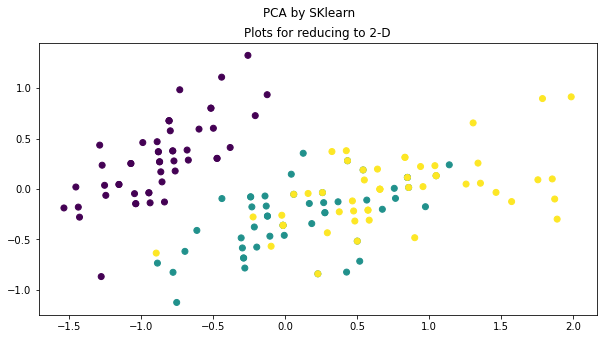

In [55]:
#EX4
pca = PCA(n_components=2)
pca_sklearn = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pca_sklearn[:, 0], pca_sklearn[:, 1], c=y)
ax.set_title(f"Plots for reducing to 2-D")
fig.suptitle("PCA by SKlearn")
plt.show()